In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
sonar_data = pd.read_csv("sonar.csv", header=None)

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar_data.shape

(208, 61)

In [5]:
sonar_data.describe()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [7]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [8]:
x = sonar_data.drop([60], axis = 1)
y = sonar_data[60]

In [9]:
x_train, x_test, y_train , y_test = train_test_split(x,y ,test_size=0.1, stratify=y, random_state=1)

In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [28]:
model_predict = model.predict(x_test)
model.score(x_test, y_test)


0.7619047619047619

In [32]:
model_acc = accuracy_score(model_predict,y_test)
confusion_matric = confusion_matrix(y_test,model_predict)
print(classification_report(model_predict, y_test))

              precision    recall  f1-score   support

           M       0.82      0.75      0.78        12
           R       0.70      0.78      0.74         9

    accuracy                           0.76        21
   macro avg       0.76      0.76      0.76        21
weighted avg       0.77      0.76      0.76        21



In [33]:
confusion_matric

array([[9, 2],
       [3, 7]], dtype=int64)

In [24]:
model_acc

0.8342245989304813

In [50]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty type
    'solver': ['liblinear', 'saga']        # Solver type
}
grid = GridSearchCV(model, param_grid= param_grid , cv=5 ,scoring = 'accuracy' )
grid.fit(x_train, y_train)

C:\Users\danielle.DESKTOP-EM4NRIV\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\danielle.DESKTOP-EM4NRIV\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\danielle.DESKTOP-EM4NRIV\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\danielle.DESKTOP-EM4NRIV\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\danielle.DESKTOP-EM4NRIV\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\daniel

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [52]:
best_params = grid.best_params_
best_score =  grid.best_score_
print("Best Hyperparameters:", best_params)
print("Best score:", best_score)



Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best score: 0.80199146514936


In [56]:
best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=1000, solver='saga')

In [67]:
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7619047619047619


In [68]:
model_predict1 = best_model.predict(x_test)
model_acctest = accuracy_score(model_predict1,y_test)

In [69]:
model_acctest 

0.7619047619047619

In [78]:
input_data = (0.0235,0.0220,0.0167,0.0516,0.0746,0.1121,0.1258,0.1717,0.3074,0.3199,0.2946,0.2484,0.2510,0.1806,0.1413,0.3019,0.3635,0.3887,0.2980,0.2219,0.1624,0.1343,0.2046,0.3791,0.5771,0.7545,0.8406,0.8547,0.9036,1.0000,0.9646,0.7912,0.6412,0.5986,0.6835,0.7771,0.8084,0.7426,0.6295,0.5708,0.4433,0.3361,0.3795,0.4950,0.4373,0.2404,0.1128,0.1654,0.0933,0.0225,0.0214,0.0221,0.0152,0.0083,0.0058,0.0023,0.0057,0.0052,0.0027,0.0021)
np_input_data = np.asarray(input_data).reshape(1,-1)

prediction = best_model.predict(np_input_data)
print(prediction)
print(best_model.score(np_input_data,['M']))

['R']
0.0


# using knn

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
k_model = KNeighborsClassifier()
k_model.fit(x_train, y_train)

KNeighborsClassifier()

In [83]:
y_pred = k_model.predict(x_test)
k_model.score(x_test,y_test)

0.8095238095238095

In [84]:
accuracy_k = accuracy_score(y_pred, y_test)

In [85]:
accuracy_k

0.8095238095238095

In [86]:
param_grid_k = {
    'n_neighbors': [3, 5, 7, 9, 11],   # Number of neighbors
    'weights': ['uniform', 'distance'],# Weight function
    'p': [1, 2]                         # Power parameter for Minkowski distance
}
grid_k = GridSearchCV(k_model, param_grid_k, cv=5)

In [94]:
grid_k.fit(x_train,y_train)
best_param_k = grid_k.best_params_

In [95]:
grid_k.best_score_

0.8502133712660027

In [96]:
opt_model_k = KNeighborsClassifier(**best_param_k)
opt_model_k.fit(x_train,y_train)
opt_model_k.score(x_test,y_test)

0.9047619047619048

In [100]:
print(  accuracy_score(y_pred, y_test))
print(opt_model_k.score(x_train,y_train))

0.8095238095238095
1.0


In [105]:
input_data = (0.0856,0.0454,0.0382,0.0203,0.0385,0.0534,0.2140,0.3110,0.2837,0.2751,0.2707,0.0946,0.1020,0.4519,0.6737,0.6699,0.7066,0.5632,0.3785,0.2721,0.5297,0.7697,0.8643,0.9304,0.9372,0.6247,0.6024,0.6810,0.5047,0.5775,0.4754,0.2400,0.2779,0.1997,0.5305,0.7409,0.7775,0.4424,0.1416,0.3508,0.4482,0.4208,0.3054,0.2235,0.2611,0.2798,0.2392,0.2021,0.1326,0.0358,0.0128,0.0172,0.0138,0.0079,0.0037,0.0051,0.0258,0.0102,0.0037,0.0037)
np_input_data = np.asarray(input_data).reshape(1,-1)

prediction = opt_model_k.predict(np_input_data)
print(prediction)
print(opt_model_k.score(np_input_data,['R']))

['R']
1.0


In [106]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [107]:
loaded_model = joblib.load('model.pkl')


In [109]:
# Assuming 'input_data' is the new input data
predictions = loaded_model.predict(np_input_data)


In [110]:
predictions

array(['R'], dtype=object)

# using pca to reduce the dimensions

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [137]:
scaler= StandardScaler()
scale_data = data_scale.fit_transform(x)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale_data)
pca.explained_variance_ratio_ *100

array([20.34655665, 18.89721637])

In [138]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])


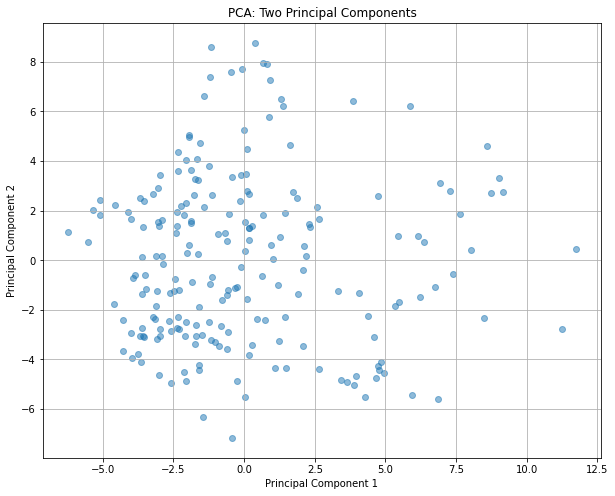

In [143]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA: Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.xticks(fontsize=10)  # Adjust the fontsize as needed
#plt.yticks(fontsize=10)  # Adjust the fontsize as needed

plt.grid(True)
plt.show()